In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('redbus.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df['ratings']=df['ratings'].round(1)

In [3]:
df

,Bus_Name,Bus_type,from,to,pickup_time,drop_time,duration,prices,ratings,AC_type,Seater,semi_sleeper,sleeper
0,IntrCity SmartBus,A/C Seater / Sleeper (2+1),HYD,VJY,23:50,05:35,5,683,4.7,A/C,yes,no,yes
1,IntrCity SmartBus,AC Sleeper (2+1),HYD,VJY,23:15,06:00,6,823,4.7,A/C,no,no,yes
2,IntrCity SmartBus,A/C Seater / Sleeper (2+1),HYD,VJY,23:30,06:05,6,639,4.7,A/C,yes,no,yes
3,AdFRESHBUS,Electric A/C Seater (2+2),HYD,VJY,04:15,10:30,6,475,4.6,A/C,yes,no,no
4,NueGo,Electric A/C Seater (2+2),HYD,VJY,05:00,11:05,6,499,4.6,A/C,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,National travels,A/C Sleeper (2+1),BLR,CHN,14:10,21:20,7,745,3.4,A/C,no,no,yes
496,National travels,A/C Sleeper (2+1),BLR,CHN,22:30,04:55,6,650,3.9,A/C,no,no,yes
497,Starlink Travels,A/C Sleeper (2+1),BLR,CHN,01:30,08:00,6,900,2.8,A/C,no,no,yes
498,VJS Travels,Bharat Benz A/C Sleeper (2+1),BLR,CHN,04:30,10:20,5,700,2.9,A/C,no,no,yes


#  Data Visualization

In [4]:
df.dtypes

Bus_Name         object
Bus_type         object
from             object
to               object
pickup_time      object
drop_time        object
duration          int64
prices            int64
ratings         float64
AC_type          object
Seater           object
semi_sleeper     object
sleeper          object
dtype: object

In [5]:
df.isna().sum()

Bus_Name        0
Bus_type        0
from            0
to              0
pickup_time     0
drop_time       0
duration        0
prices          0
ratings         0
AC_type         0
Seater          0
semi_sleeper    0
sleeper         0
dtype: int64

In [6]:
df.duplicated().sum()

0

## Univariate

## Bivariate 

## Multivariate 

### Histogram

##### Histogram of Bus Ratings

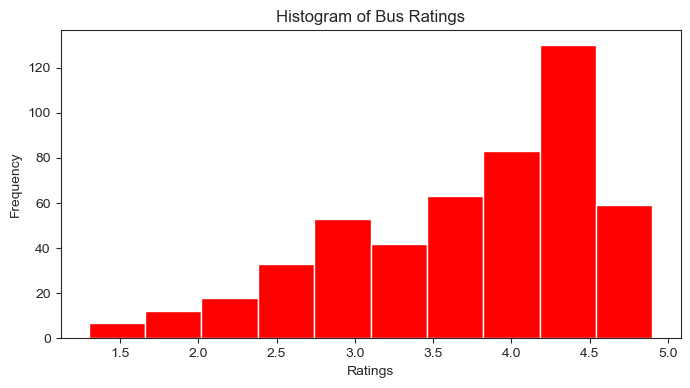

In [7]:
sns.set_style('ticks')
plt.figure(figsize=(8,4))
plt.hist(df['ratings'],bins=10,color='red')
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Histogram of Bus Ratings")
plt.show()

### Density plot

##### Histogram of Bus Rating basesd on AC type

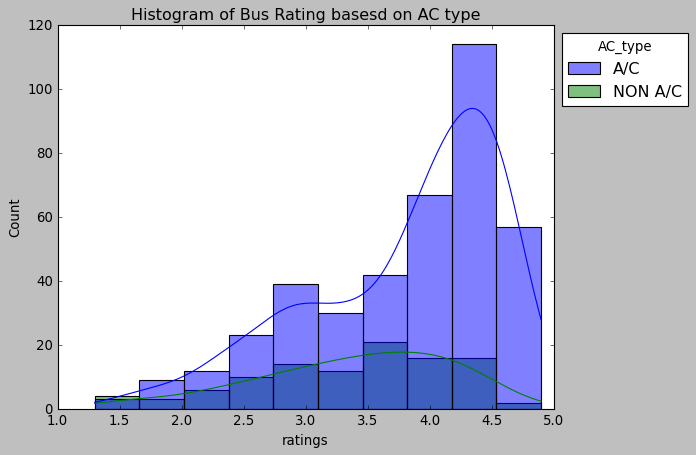

In [40]:
plt.style.use('classic')
plt.title("Histogram of Bus Rating basesd on AC type")
ax = sns.histplot(data=df,x='ratings',bins=10,color='red',hue='AC_type',kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

##### Density plot of Bus Rating basesd on sleeper type

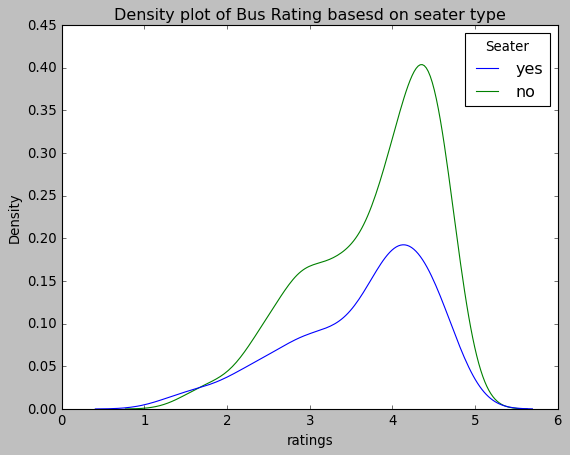

In [9]:
plt.style.context('Solarize_Light2')
plt.title("Density plot of Bus Rating basesd on seater type")
sns.kdeplot(data=df,x='ratings',hue='Seater')
plt.show()

##### Density plot of Bus Rating basesd on semi-sleeper type

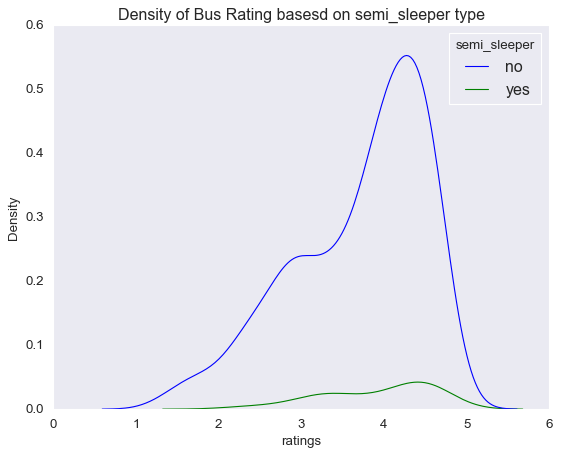

In [10]:
sns.set_style('dark')
plt.title("Density of Bus Rating basesd on semi_sleeper type")
sns.kdeplot(data=df,x='ratings',hue='semi_sleeper')
plt.show()

##### Density plot of Bus Rating basesd on sleeper type

C:\Users\varsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


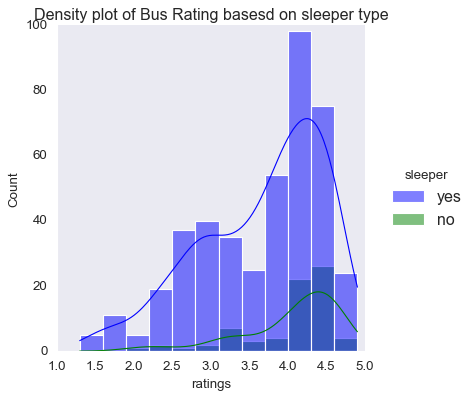

In [11]:
plt.style.context('ggplot')
sns.displot(data=df,x="ratings",hue='sleeper',kde=True).set(title='Density plot of Bus Rating basesd on sleeper type')
plt.show()

### box plot

### line chart

### Bar plot

##### barplots for bus_types

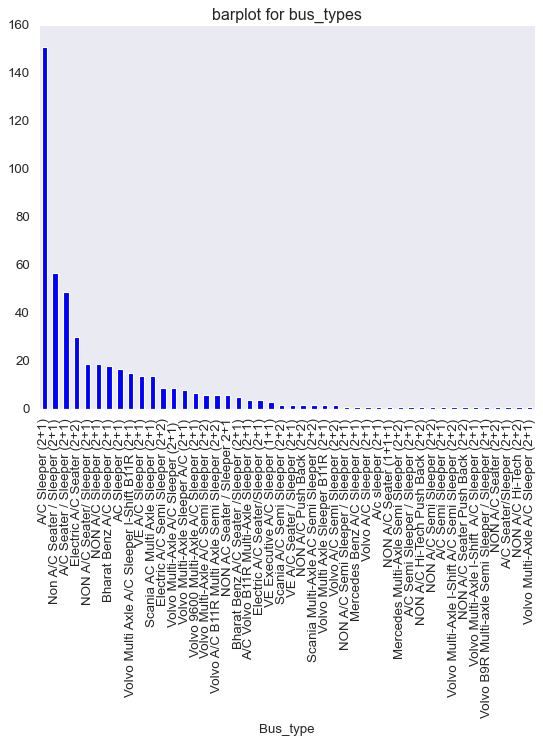

In [12]:
plt.style.context('ggplot')
df['Bus_type'].value_counts().plot(kind='bar').set(title='barplot for bus_types')
plt.show()

##### Barplots to find average ratings of ac buses

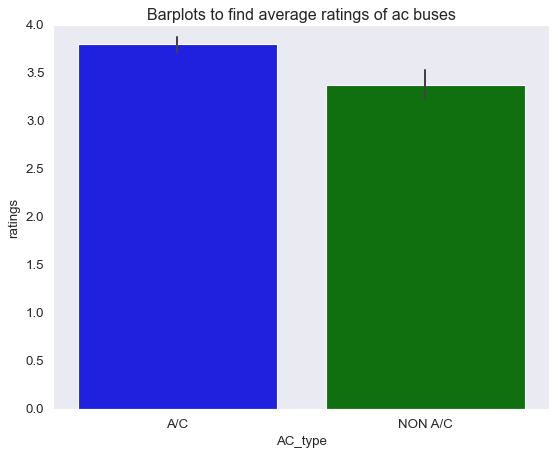

In [13]:
sns.set_style('dark')
sns.barplot(data=df,x='AC_type',y='ratings').set(title='Barplots to find average ratings of ac buses')
plt.show()

##### Barplots to find average ratings of sleeper buses

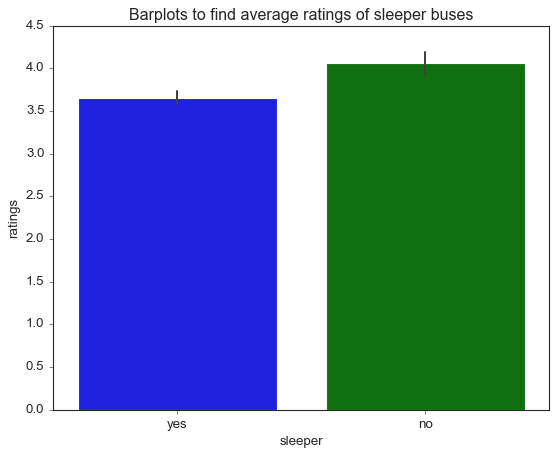

In [14]:
sns.set_style('ticks')
sns.barplot(data=df,x='sleeper',y='ratings').set(title='Barplots to find average ratings of sleeper buses')
plt.show()

##### Barplots to find average ratings of seater buses

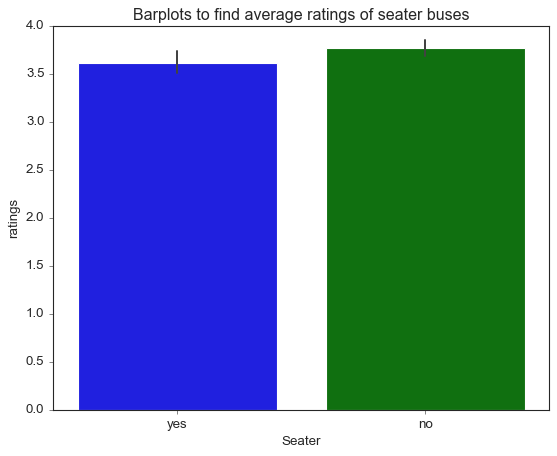

In [15]:
sns.barplot(data=df,x='Seater',y='ratings').set(title='Barplots to find average ratings of seater buses')
plt.show()

##### Barplots to find average ratings of seater buses

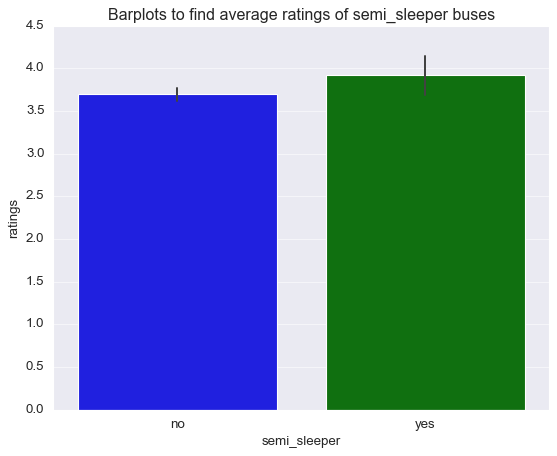

In [16]:
sns.set_style('darkgrid')
sns.barplot(data=df,x='semi_sleeper',y='ratings').set(title='Barplots to find average ratings of semi_sleeper buses')
plt.show()

### count_plot

##### count plot is used to find count the number of occurences of ac_type

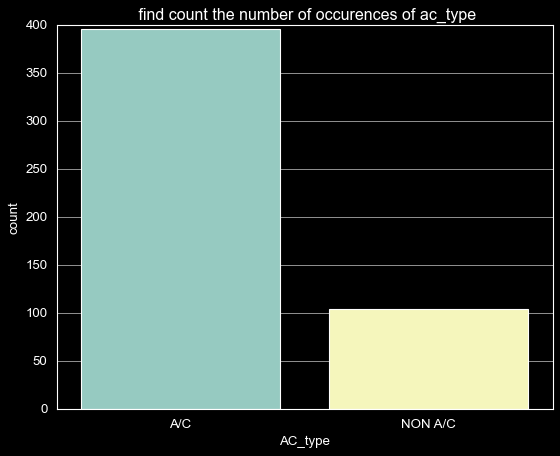

In [17]:
plt.style.use('dark_background')
sns.countplot(data=df,x='AC_type').set(title=' find count the number of occurences of ac_type')
plt.show()

In [18]:
df['AC_type'].value_counts()

AC_type
A/C        396
NON A/C    104
Name: count, dtype: int64

# Bivariate

### categorical vs categorical

##### A complete data of number  AC type and Seater type buses

In [19]:
s1=pd.crosstab(df['sleeper'],df['AC_type'])
s2=pd.crosstab(df['semi_sleeper'],df['AC_type'])
s3=pd.crosstab(df['Seater'],df['AC_type'])
s=pd.concat([s1,s2,s3],axis=0)
s.index = ['non sleeper', 'sleeper', 'non semi_sleeper', 'semi_sleeper', 'non seater', 'seater']

In [20]:
s

AC_type,A/C,NON A/C
non sleeper,63,9
sleeper,333,95
non semi_sleeper,364,102
semi_sleeper,32,2
non seater,299,25
seater,97,79


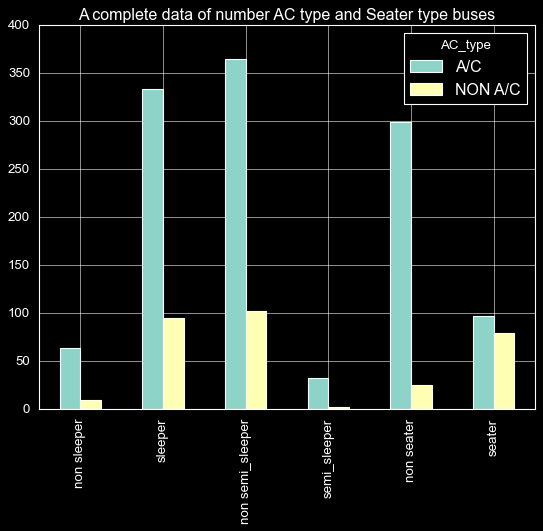

In [21]:
s.plot(kind='bar').set(title='A complete data of number AC type and Seater type buses')
plt.show()

##### Top 5 AC travel bus names

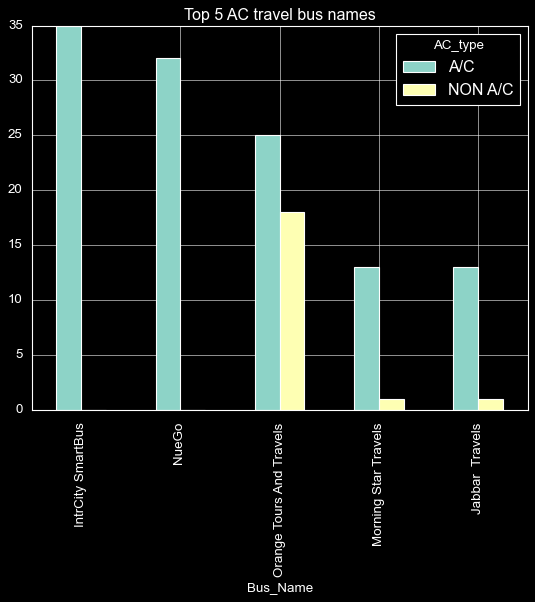

In [29]:
pd.crosstab(df['Bus_Name'],df['AC_type']).sort_values('A/C',ascending=False).head(5).plot(kind='bar').set(title='Top 5 AC travel bus names')
plt.show()

##### Top 5 NON AC travel bus names

In [23]:
pd.crosstab(df['Bus_Name'],df['AC_type']).sort_values('NON A/C',ascending=False).head(5)

AC_type,A/C,NON A/C
Bus_Name,,
Orange Tours And Travels,25,18
Sri KVR Travels,1,6
V Kaveri Travels,7,6
KKaveri Travels,0,5
Sri Atluri Travels,1,4


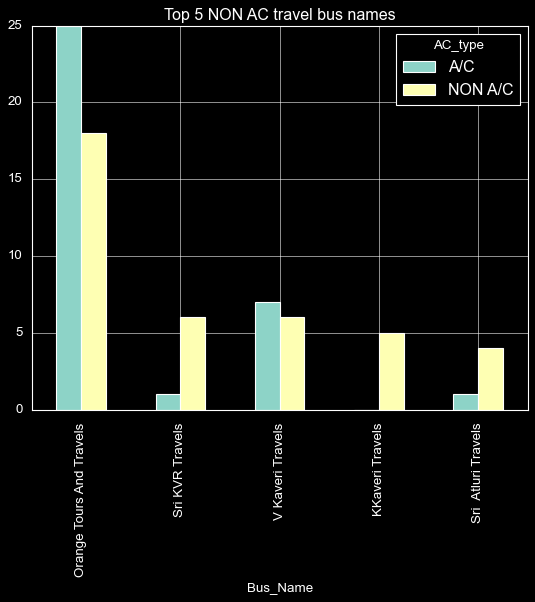

In [30]:
pd.crosstab(df['Bus_Name'],df['AC_type']).sort_values('NON A/C',ascending=False).head(5).plot(kind='bar').set(title='Top 5 NON AC travel bus names')
plt.show()


### Continous Vs Continous

* Its find relationship between two continous variable
* Disadvantage:-is subjective (quality),u can't say its quantity,only for 2 variable

## Multi variate 

### heatplot

### pairplot

## Journeys(Trips)

In [24]:
#trip1
jr1=df[(df['from']=='HYD') & (df['to']=='VJY')]
#trip2
jr2=df[(df['from']=='HYD') & (df['to']=='BLR') ]
jr2.reset_index(drop=True,inplace=True)
#trip3
jr3=df[(df['from']=='BLR') & (df['to']=='CHN') ]
jr2.reset_index(drop=True,inplace=True)

In [25]:
jr1

,Bus_Name,Bus_type,from,to,pickup_time,drop_time,duration,prices,ratings,AC_type,Seater,semi_sleeper,sleeper
0,IntrCity SmartBus,A/C Seater / Sleeper (2+1),HYD,VJY,23:50,05:35,5,683,4.7,A/C,yes,no,yes
1,IntrCity SmartBus,AC Sleeper (2+1),HYD,VJY,23:15,06:00,6,823,4.7,A/C,no,no,yes
2,IntrCity SmartBus,A/C Seater / Sleeper (2+1),HYD,VJY,23:30,06:05,6,639,4.7,A/C,yes,no,yes
3,AdFRESHBUS,Electric A/C Seater (2+2),HYD,VJY,04:15,10:30,6,475,4.6,A/C,yes,no,no
4,NueGo,Electric A/C Seater (2+2),HYD,VJY,05:00,11:05,6,499,4.6,A/C,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Yolo Bus,A/C Sleeper (2+1),HYD,VJY,19:40,02:29,6,1299,4.0,A/C,no,no,yes
190,Vahini Travels,NON A/C Push Back (2+2),HYD,VJY,20:41,03:45,7,3000,4.0,NON A/C,no,no,no
191,Sri Tulasi Tours and Travels,A/C Seater / Sleeper (2+1),HYD,VJY,16:20,23:20,7,1299,4.0,A/C,yes,no,yes
192,Sri Tulasi Tours and Travels,A/C Seater / Sleeper (2+1),HYD,VJY,14:20,21:30,7,1799,4.0,A/C,yes,no,yes


In [26]:
jr2

,Bus_Name,Bus_type,from,to,pickup_time,drop_time,duration,prices,ratings,AC_type,Seater,semi_sleeper,sleeper
0,KSM Roadways,A/C Volvo B11R Multi-Axle Sleeper (2+1),HYD,BLR,22:00,07:47,9,1899,4.8,A/C,no,no,yes
1,VSR Tours and Travels,A/C Sleeper (2+1),HYD,BLR,20:40,07:15,10,899,4.7,A/C,no,no,yes
2,Jabbar Travels,Scania AC Multi Axle Sleeper (2+1),HYD,BLR,22:30,08:10,9,1200,4.7,A/C,no,no,yes
3,AdNovember Travels,A/C Seater / Sleeper (2+1),HYD,BLR,23:20,09:15,9,980,4.3,A/C,yes,no,yes
4,Jabbar Travels,VE A/C Sleeper (2+1),HYD,BLR,21:40,07:35,9,1200,4.7,A/C,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,VRL Travels,NON A/C Sleeper (2+1),HYD,BLR,21:45,06:30,8,900,3.5,NON A/C,no,no,yes
169,VRL Travels,Volvo 9600 Multi-Axle A/C Sleeper (2+1),HYD,BLR,22:45,06:30,7,1300,3.0,A/C,no,no,yes
170,VRL Travels,A/C Sleeper (2+1),HYD,BLR,21:00,07:15,10,1000,1.9,A/C,no,no,yes
171,VRL Travels,A/C Sleeper (2+1),HYD,BLR,20:00,07:30,11,1200,3.2,A/C,no,no,yes


In [27]:
jr3

,Bus_Name,Bus_type,from,to,pickup_time,drop_time,duration,prices,ratings,AC_type,Seater,semi_sleeper,sleeper
367,KMRL Kalaimakal,A/C Seater / Sleeper (2+1),BLR,CHN,22:15,05:00,6,640,4.8,A/C,yes,no,yes
368,V2K Travels,A/C Sleeper (2+1),BLR,CHN,22:00,04:50,6,800,4.7,A/C,no,no,yes
369,Jabbar Travels,Volvo A/C B11R Multi Axle Semi Sleeper (2+2),BLR,CHN,23:15,05:25,6,500,4.6,A/C,no,yes,no
370,AdIntrCity SmartBus,A/C Seater / Sleeper (2+1),BLR,CHN,23:05,06:10,7,586,4.1,A/C,yes,no,yes
371,KMRL Kalaimakal,A/C Sleeper (2+1),BLR,CHN,22:00,04:45,6,850,4.7,A/C,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,National travels,A/C Sleeper (2+1),BLR,CHN,14:10,21:20,7,745,3.4,A/C,no,no,yes
496,National travels,A/C Sleeper (2+1),BLR,CHN,22:30,04:55,6,650,3.9,A/C,no,no,yes
497,Starlink Travels,A/C Sleeper (2+1),BLR,CHN,01:30,08:00,6,900,2.8,A/C,no,no,yes
498,VJS Travels,Bharat Benz A/C Sleeper (2+1),BLR,CHN,04:30,10:20,5,700,2.9,A/C,no,no,yes


In [28]:
jr1.to_csv('jr1.csv')
jr2.to_csv('jr2.csv')
jr3.to_csv('jr3.csv')